In [1]:
import pymongo
import matplotlib.pyplot as plt
import pandas as pd
from pylab import mpl
# 设置中文字体
mpl.rcParams["font.sans-serif"] = ["SimHei"]
# 设置正常显示符号
mpl.rcParams["axes.unicode_minus"] = False

In [2]:
client = pymongo.MongoClient('mongodb://127.0.0.1')
db = client.lagou
collection = db.lagou

data = list(collection.find({}, {'companySize': 1, 'city': 1}))

In [3]:
companySize = sorted(set(entry['companySize'] for entry in data if entry['companySize']), reverse=True)
companySize

['少于15人', '500-2000人', '50-150人', '2000人以上', '150-500人', '15-50人']

In [4]:
# 将数据转化为DataFrame
df = pd.DataFrame(data)

# 打印DataFrame
df.head()

,_id,companySize,city
0,6506a78e3d709b873bcc18b0,500-2000人,深圳
1,6506a7973d709b873bcc18b1,15-50人,深圳
2,6506a7a43d709b873bcc18b2,500-2000人,深圳
3,6506a7ae3d709b873bcc18b3,2000人以上,深圳
4,6506a7b53d709b873bcc18b4,2000人以上,深圳


In [5]:
# 对psize列进行去重
df_unique_psize = df.drop_duplicates(subset=['companySize'])

# 打印去重后的DataFrame
df_unique_psize

,_id,companySize,city
0,6506a78e3d709b873bcc18b0,500-2000人,深圳
1,6506a7973d709b873bcc18b1,15-50人,深圳
3,6506a7ae3d709b873bcc18b3,2000人以上,深圳
6,6506a7c43d709b873bcc18b6,150-500人,深圳
11,6506a7eb3d709b873bcc18bb,50-150人,深圳
44,6508015d2d81539042c96824,少于15人,深圳
361,650801732d81539042c96b12,None,深圳


In [28]:
# 计算psize为空的数量
psize_empty_count = df['companySize'].isna().sum()

# 打印结果
print(f'companySize为空的数量为：{psize_empty_count}')

companySize为空的数量为：44


In [12]:
result=collection.find_one()
result

{'_id': ObjectId('6506a78e3d709b873bcc18b0'),
 'positionId': 8502157,
 'positionName': '软件测试工程师',
 'companyName': '博奥特科技',
 'companySize': '500-2000人',
 'city': '深圳',
 'salary': '13k-17k',
 'salaryMonth': 0,
 'workYear': '3-5年',
 'education': '本科',
 'hrName': '林依婷',
 'jobDetail': '1.有证券、基金、期货行业经验，熟悉证券相关业务优先。 2.测试理论知识扎实，具备测试设计能力，具备较强的分析能力和定位问题的能力。 3.具备良好的团队合作精神、责任心强，具有较强的学习沟通能力，有自我追求。',
 'timeInfo': '一个月前来过',
 'companyId': 69152}

In [13]:
result=collection.find()
result

In [22]:
# 获取psize为空的数据
empty_psize_data = df[df['companySize'].isna()]

# 打印DataFrame
empty_psize_data

,_id,companySize,city
361,650801732d81539042c96b12,None,深圳
375,650801742d81539042c96b2f,None,深圳
376,650801742d81539042c96b31,None,深圳
383,650801742d81539042c96b3f,None,深圳
386,650801762d81539042c96b46,None,深圳
555,650801852d81539042c96cd0,None,广州
556,650801852d81539042c96cd2,None,广州
684,6508018e2d81539042c96def,None,广州
722,650801902d81539042c96e3e,None,广州
795,650801962d81539042c96ef0,None,杭州


In [7]:
# 创建一个新列 'psize_category'，根据 custom_order 分类
custom_order = ['少于15人', '15-50人', '50-150人', '150-500人', '500-2000人', '2000人以上']
df['psize_category'] = pd.Categorical(df['companySize'], categories=custom_order, ordered=True)

# 使用 groupby 进行统计
result_size = df.groupby(['psize_category', 'city']).size().unstack(fill_value=0)

# 将结果转换为字典形式
city_data = result_size.to_dict()
result_size

city,上海,北京,广州,杭州,深圳
psize_category,,,,,
少于15人,8,17,6,5,11
15-50人,50,41,26,37,50
50-150人,71,102,32,33,75
150-500人,83,85,45,51,78
500-2000人,86,93,41,36,100
2000人以上,176,311,91,87,309


In [30]:
city_data

{'上海': {'少于15人': 8,
  '15-50人': 50,
  '50-150人': 71,
  '150-500人': 83,
  '500-2000人': 86,
  '2000人以上': 176},
 '北京': {'少于15人': 17,
  '15-50人': 41,
  '50-150人': 102,
  '150-500人': 85,
  '500-2000人': 93,
  '2000人以上': 311},
 '广州': {'少于15人': 6,
  '15-50人': 26,
  '50-150人': 32,
  '150-500人': 45,
  '500-2000人': 41,
  '2000人以上': 91},
 '杭州': {'少于15人': 5,
  '15-50人': 37,
  '50-150人': 33,
  '150-500人': 51,
  '500-2000人': 36,
  '2000人以上': 87},
 '深圳': {'少于15人': 11,
  '15-50人': 50,
  '50-150人': 75,
  '150-500人': 78,
  '500-2000人': 100,
  '2000人以上': 309}}

C:\Users\Administrator.USER-20230331BU\AppData\Roaming\Python\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Administrator.USER-20230331BU\AppData\Roaming\Python\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21516 (\N{CJK UNIFIED IDEOGRAPH-540C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Administrator.USER-20230331BU\AppData\Roaming\Python\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 22478 (\N{CJK UNIFIED IDEOGRAPH-57CE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Administrator.USER-20230331BU\AppData\Roaming\Python\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24066 (\N{CJK UNIFIED IDEOGRAPH-5E02}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Administrator.U

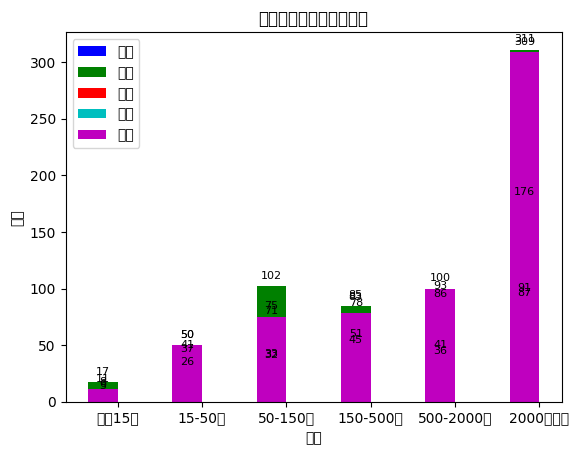

In [32]:
# 设置柱状图的宽度
bar_width = 0.35

# 设置颜色
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# 绘制柱状图
fig, ax = plt.subplots()

for i, psize in enumerate(result):
    city_counts = city_data[psize]
    bars = ax.bar(range(len(city_counts)), city_counts.values(), width=bar_width, label=psize, color=colors[i % len(colors)])

    # 添加城市标签
    ax.set_xticks([r + bar_width/2 for r in range(len(city_counts))])
    ax.set_xticklabels(city_counts.keys())

    # 添加柱状图顶部的数值标签
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval, 1), ha='center', va='bottom', fontsize=8)

# 添加图例
ax.legend()

# 添加标题和标签
plt.xlabel('城市')
plt.ylabel('数量')
plt.title('不同城市的公司规模分布')

# 显示图形
plt.show()


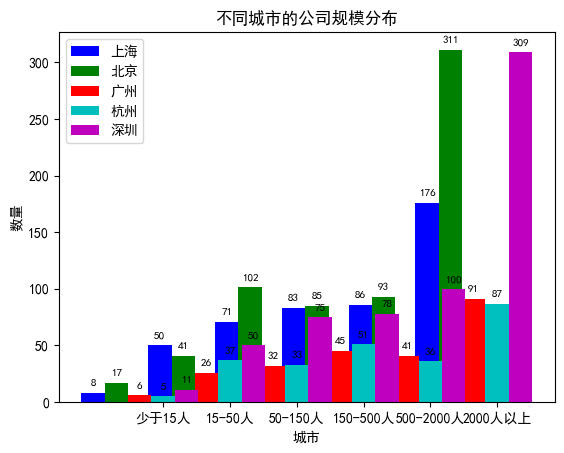

In [36]:
# 绘制柱状图
fig, ax = plt.subplots()

for i, psize in enumerate(result):
    city_counts = city_data[psize]

    # 调整横坐标的位置
    x = [r + i * bar_width for r in range(len(city_counts))]

    bars = ax.bar(x, city_counts.values(), width=bar_width, label=psize, color=colors[i % len(colors)])

    # 添加柱状图顶部的数值标签
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval, 1), ha='center', va='bottom', fontsize=8)

# 添加城市标签
ax.set_xticks([r + bar_width*(len(result)/2) for r in range(len(city_counts))])
ax.set_xticklabels(city_counts.keys())

# 添加图例
ax.legend()

# 添加标题和标签
plt.xlabel('城市')
plt.ylabel('数量')
plt.title('不同城市的公司规模分布')

# 显示图形
plt.show()


<Figure size 640x480 with 0 Axes>

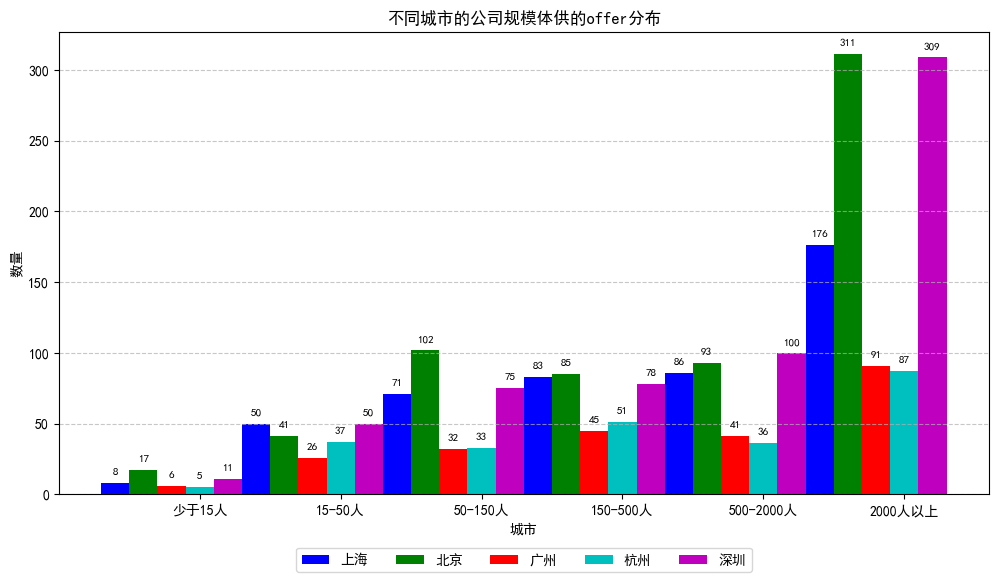

In [9]:
# 设置柱状图的宽度
bar_width = 0.2
offset = 0.1  # 设置间隔的宽度
# 设置颜色
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# 调整图的大小
plt.figure()

# 绘制柱状图
fig, ax = plt.subplots(figsize=(12, 6))

for i, size in enumerate(result_size):
    city_counts = city_data[size]

    # 调整横坐标的位置
    x = [r + i * bar_width for r in range(len(city_counts))]

    bars = ax.bar(x, city_counts.values(), width=bar_width, label=size, color=colors[i % len(colors)])

    # 添加柱状图顶部的数值标签
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval, 1), ha='center', va='bottom', fontsize=8)
# 添加网格
ax.grid(axis='y', linestyle='--', alpha=0.7)
# 添加城市标签
ax.set_xticks([r + bar_width*(len(result_size)/2) for r in range(len(city_counts))])
ax.set_xticklabels(city_counts.keys())

# 添加图例
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=len(result_size))

# 添加标题和标签
plt.xlabel('城市')
plt.ylabel('数量')
plt.title('不同城市的公司规模体供的offer分布')
plt.savefig("company_size.png")
# 显示图形
plt.show()

In [10]:
salary_data = list(collection.find({}, {'salary': 1, 'city': 1}))
salary_data

[{'_id': ObjectId('6506a78e3d709b873bcc18b0'),
  'city': '深圳',
  'salary': '13k-17k'},
 {'_id': ObjectId('6506a7973d709b873bcc18b1'),
  'city': '深圳',
  'salary': '10k-20k'},
 {'_id': ObjectId('6506a7a43d709b873bcc18b2'),
  'city': '深圳',
  'salary': '15k-25k'},
 {'_id': ObjectId('6506a7ae3d709b873bcc18b3'),
  'city': '深圳',
  'salary': '12k-18k'},
 {'_id': ObjectId('6506a7b53d709b873bcc18b4'),
  'city': '深圳',
  'salary': '20k-40k'},
 {'_id': ObjectId('6506a7be3d709b873bcc18b5'),
  'city': '深圳',
  'salary': '30k-60k'},
 {'_id': ObjectId('6506a7c43d709b873bcc18b6'),
  'city': '深圳',
  'salary': '18k-33k'},
 {'_id': ObjectId('6506a7d03d709b873bcc18b7'),
  'city': '深圳',
  'salary': '15k-25k'},
 {'_id': ObjectId('6506a7d73d709b873bcc18b8'),
  'city': '深圳',
  'salary': '23k-28k'},
 {'_id': ObjectId('6506a7df3d709b873bcc18b9'),
  'city': '深圳',
  'salary': '18k-35k'},
 {'_id': ObjectId('6506a7e53d709b873bcc18ba'),
  'city': '深圳',
  'salary': '17k-25k'},
 {'_id': ObjectId('6506a7eb3d709b873bcc18bb

In [76]:
salary_interval = sorted(set(entry['salary'] for entry in salary_data if entry['salary']), reverse=True)
salary_interval

['9k-18k',
 '9k-17k',
 '9k-16k',
 '9k-15k',
 '9k-14k',
 '9k-13k',
 '9k-12k',
 '9k-11k',
 '9k-10k',
 '8k-9k',
 '8k-16k',
 '8k-15k',
 '8k-14k',
 '8k-13k',
 '8k-12k',
 '8k-11k',
 '8k-10k',
 '7k-9k',
 '7k-8k',
 '7k-14k',
 '7k-13k',
 '7k-12k',
 '7k-11k',
 '7k-10k',
 '6k-9k',
 '6k-8k',
 '6k-7k',
 '6k-12k',
 '6k-11k',
 '6k-10k',
 '5k-8k',
 '5k-7k',
 '5k-6k',
 '5k-10k',
 '50k-80k',
 '50k-70k',
 '50k-60k',
 '50k-100k',
 '4k-8k',
 '4k-7k',
 '4k-6k',
 '4k-5k',
 '45k-80k',
 '45k-60k',
 '45k-55k',
 '45k-50k',
 '40k-80k',
 '40k-70k',
 '40k-60k',
 '3k-6k',
 '3k-5k',
 '3k-4k',
 '36k-40k',
 '35k-70k',
 '35k-65k',
 '35k-60k',
 '35k-55k',
 '35k-50k',
 '35k-45k',
 '35k-42k',
 '35k-40k',
 '30k-60k',
 '30k-59k',
 '30k-55k',
 '30k-50k',
 '30k-45k',
 '30k-40k',
 '30k-35k',
 '300k-500k',
 '2k-4k',
 '2k-3k',
 '28k-50k',
 '28k-45k',
 '28k-37k',
 '28k-35k',
 '26k-40k',
 '25k-50k',
 '25k-49k',
 '25k-48k',
 '25k-45k',
 '25k-40k',
 '25k-35k',
 '25k-34k',
 '25k-30k',
 '25k-28k',
 '24k-45k',
 '24k-40k',
 '23k-46k',
 '

In [11]:
# 将数据转化为DataFrame
df_salary = pd.DataFrame(salary_data)

# 打印去重后的DataFrame
df_salary

,_id,city,salary
0,6506a78e3d709b873bcc18b0,深圳,13k-17k
1,6506a7973d709b873bcc18b1,深圳,10k-20k
2,6506a7a43d709b873bcc18b2,深圳,15k-25k
3,6506a7ae3d709b873bcc18b3,深圳,12k-18k
4,6506a7b53d709b873bcc18b4,深圳,20k-40k
...,...,...,...
2275,650a877a2a9c988a3630507e,深圳,25k-50k
2276,650ab0832a9c988a363083e6,深圳,10k-12k
2277,650ac9c02a9c988a3630a765,深圳,9k-15k
2278,650acf512a9c988a3630ad23,深圳,15k-30k


In [78]:
df_unique_salary['salary']

0       13k-17k
1       10k-20k
2       15k-25k
3       12k-18k
4       20k-40k
         ...   
2211    28k-45k
2226    23k-45k
2243    25k-28k
2251    24k-45k
2259    45k-60k
Name: salary, Length: 203, dtype: object

In [12]:
# 导入 pandas 库
import pandas as pd

# 假设 df_unique_salary 包含了薪资区间的列 'salary'
# 先将薪资区间拆分成最低薪资和最高薪资
df_salary[['min_salary', 'max_salary']] = df_salary['salary'].str.split('-', expand=True)

# 将薪资转换为数字类型
df_salary['min_salary'] = df_salary['min_salary'].str.rstrip('k').astype(int)
df_salary['max_salary'] = df_salary['max_salary'].str.rstrip('k').astype(int)

# 计算中间值
df_salary['median_salary'] = (df_salary['min_salary'] + df_salary['max_salary']) / 2

# 删除不需要的列
df_salary = df_salary.drop(columns=['min_salary', 'max_salary'])

# 打印转换后的 DataFrame
df_salary


,_id,city,salary,median_salary
0,6506a78e3d709b873bcc18b0,深圳,13k-17k,15.0
1,6506a7973d709b873bcc18b1,深圳,10k-20k,15.0
2,6506a7a43d709b873bcc18b2,深圳,15k-25k,20.0
3,6506a7ae3d709b873bcc18b3,深圳,12k-18k,15.0
4,6506a7b53d709b873bcc18b4,深圳,20k-40k,30.0
...,...,...,...,...
2275,650a877a2a9c988a3630507e,深圳,25k-50k,37.5
2276,650ab0832a9c988a363083e6,深圳,10k-12k,11.0
2277,650ac9c02a9c988a3630a765,深圳,9k-15k,12.0
2278,650acf512a9c988a3630ad23,深圳,15k-30k,22.5


In [13]:
import pandas as pd

# 假设 df_unique_salary 包含了城市、薪资区间、中间薪资的列
# 创建一个新列 'salary_order'，根据 median_salary 映射到对应的 salary_order
def map_salary_order(median_salary):
    salary_order = ['8k以下', '8-10k', '10-15k', '15-25k', '25-50k', '50k以上']
    if median_salary < 8:
        return '8k以下'
    elif median_salary <= 10:
        return '8-10k'
    elif median_salary <= 15:
        return '10-15k'
    elif median_salary <= 25:
        return '15-25k'
    elif median_salary <= 50:
        return '25-50k'
    else:
        return '50k以上'

df_salary['salary_order'] = df_salary['median_salary'].apply(map_salary_order)

# 打印转换后的 DataFrame
df_salary


,_id,city,salary,median_salary,salary_order
0,6506a78e3d709b873bcc18b0,深圳,13k-17k,15.0,10-15k
1,6506a7973d709b873bcc18b1,深圳,10k-20k,15.0,10-15k
2,6506a7a43d709b873bcc18b2,深圳,15k-25k,20.0,15-25k
3,6506a7ae3d709b873bcc18b3,深圳,12k-18k,15.0,10-15k
4,6506a7b53d709b873bcc18b4,深圳,20k-40k,30.0,25-50k
...,...,...,...,...,...
2275,650a877a2a9c988a3630507e,深圳,25k-50k,37.5,25-50k
2276,650ab0832a9c988a363083e6,深圳,10k-12k,11.0,10-15k
2277,650ac9c02a9c988a3630a765,深圳,9k-15k,12.0,10-15k
2278,650acf512a9c988a3630ad23,深圳,15k-30k,22.5,15-25k


In [141]:
result = df_salary['salary_order'].value_counts().to_dict()
print(result)


{'15-25k': 777, '25-50k': 597, '10-15k': 588, '8-10k': 157, '8k以下': 135, '50k以上': 26}


In [14]:
result = df_salary.groupby(['city', 'salary_order']).size().reset_index(name='count')
result_dict = {}
for _, row in result.iterrows():
    city = row['city']
    salary_order = row['salary_order']
    count = row['count']
    if city not in result_dict:
        result_dict[city] = {}
    result_dict[city][salary_order] = count

print(result_dict)

{'上海': {'10-15k': 102, '15-25k': 180, '25-50k': 139, '50k以上': 6, '8-10k': 35, '8k以下': 27}, '北京': {'10-15k': 158, '15-25k': 192, '25-50k': 235, '50k以上': 11, '8-10k': 39, '8k以下': 27}, '广州': {'10-15k': 78, '15-25k': 86, '25-50k': 18, '8-10k': 28, '8k以下': 35}, '杭州': {'10-15k': 86, '15-25k': 78, '25-50k': 49, '50k以上': 2, '8-10k': 14, '8k以下': 26}, '深圳': {'10-15k': 164, '15-25k': 241, '25-50k': 156, '50k以上': 7, '8-10k': 41, '8k以下': 20}}


In [15]:
df = pd.DataFrame(result_dict)

# 显示表格
df

,上海,北京,广州,杭州,深圳
10-15k,102,158,78.0,86,164
15-25k,180,192,86.0,78,241
25-50k,139,235,18.0,49,156
50k以上,6,11,NaN,2,7
8-10k,35,39,28.0,14,41
8k以下,27,27,35.0,26,20


In [16]:
# 假设 df 是你的 DataFrame
# 重新排序行
row_order = ['8k以下', '8-10k', '10-15k', '15-25k', '25-50k', '50k以上']
df = df.loc[row_order]

# 重新排序列
column_order = ['上海', '北京', '广州', '杭州', '深圳']
df = df[column_order]

df


,上海,北京,广州,杭州,深圳
8k以下,27,27,35.0,26,20
8-10k,35,39,28.0,14,41
10-15k,102,158,78.0,86,164
15-25k,180,192,86.0,78,241
25-50k,139,235,18.0,49,156
50k以上,6,11,NaN,2,7


In [17]:
# 假设 df 是你的数据框

# 先将 NaN 替换为 0
df = df.fillna(0)

# 将数据框转换为字典
result_dict = df.to_dict(orient='index')

# 调整字典的结构
final_result = {}
for city, data in result_dict.items():
    for salary_range, value in data.items():
        if salary_range not in final_result:
            final_result[salary_range] = {}
        final_result[salary_range][city] = int(value)

# 打印最终结果
print(final_result)


{'上海': {'8k以下': 27, '8-10k': 35, '10-15k': 102, '15-25k': 180, '25-50k': 139, '50k以上': 6}, '北京': {'8k以下': 27, '8-10k': 39, '10-15k': 158, '15-25k': 192, '25-50k': 235, '50k以上': 11}, '广州': {'8k以下': 35, '8-10k': 28, '10-15k': 78, '15-25k': 86, '25-50k': 18, '50k以上': 0}, '杭州': {'8k以下': 26, '8-10k': 14, '10-15k': 86, '15-25k': 78, '25-50k': 49, '50k以上': 2}, '深圳': {'8k以下': 20, '8-10k': 41, '10-15k': 164, '15-25k': 241, '25-50k': 156, '50k以上': 7}}


<Figure size 640x480 with 0 Axes>

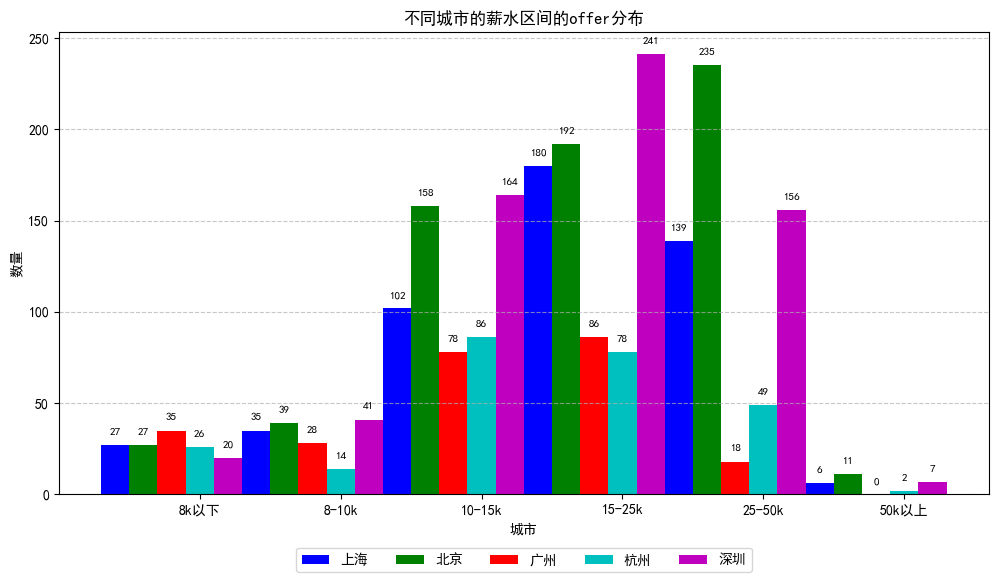

In [18]:
# 设置柱状图的宽度
bar_width = 0.2
offset = 0.1  # 设置间隔的宽度
# 设置颜色
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# 调整图的大小
plt.figure()

# 绘制柱状图
fig, ax = plt.subplots(figsize=(12, 6))

for i, salary in enumerate(df):
    city_counts = final_result[salary]

    # 调整横坐标的位置
    x = [r + i * bar_width for r in range(len(city_counts))]

    bars = ax.bar(x, city_counts.values(), width=bar_width, label=salary, color=colors[i % len(colors)])

    # 添加柱状图顶部的数值标签
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval, 1), ha='center', va='bottom', fontsize=8)
# 添加网格
ax.grid(axis='y', linestyle='--', alpha=0.7)
# 添加城市标签
ax.set_xticks([r + bar_width*(len(df)/2) for r in range(len(city_counts))])
ax.set_xticklabels(city_counts.keys())

# 添加图例
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=len(df))

# 添加标题和标签
plt.xlabel('城市')
plt.ylabel('数量')
plt.title('不同城市的薪水区间的offer分布')
plt.savefig("company_salary.png")

# 显示图形
plt.show()